In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pylab import rcParams
warnings.filterwarnings('ignore')

In [2]:
sns.set_style("darkgrid")

In [3]:
data = pd.read_csv('heart.csv')

### Data Exploration

In [4]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
data.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [7]:
data.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [8]:
data['age'].nunique()

41

In [9]:
for x in data.columns.values:
    print(x+': '+str(data[x].nunique()))

age: 41
sex: 2
cp: 4
trtbps: 49
chol: 152
fbs: 2
restecg: 3
thalachh: 91
exng: 2
oldpeak: 40
slp: 3
caa: 5
thall: 4
output: 2


## Creating Copy of the Data for Data Visualization

In [10]:
c_data = data.copy()

c_data['sex'] = c_data['sex'].map({0:'Male', 1:'Female'})
c_data['exng'] = c_data['exng'].map({0:'False', 1:'True'})
c_data['cp'] = c_data['cp'].map({0:'typical angina', 1:'atypical angina', 2:'non-anginal pain', 3:'asymptomatic'})
c_data['fbs'] = c_data['fbs'].map({0:'False', 1:'True'})
c_data['output'] = c_data['output'].map({0:'Less Chance', 1:'More Chance'})

c_data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,Female,asymptomatic,145,233,True,0,150,False,2.3,0,0,1,More Chance
1,37,Female,non-anginal pain,130,250,False,1,187,False,3.5,0,0,2,More Chance
2,41,Male,atypical angina,130,204,False,0,172,False,1.4,2,0,2,More Chance
3,56,Female,atypical angina,120,236,False,1,178,False,0.8,2,0,2,More Chance
4,57,Male,typical angina,120,354,False,1,163,True,0.6,2,0,2,More Chance


# Visualization

### Visualize Categorical Columns

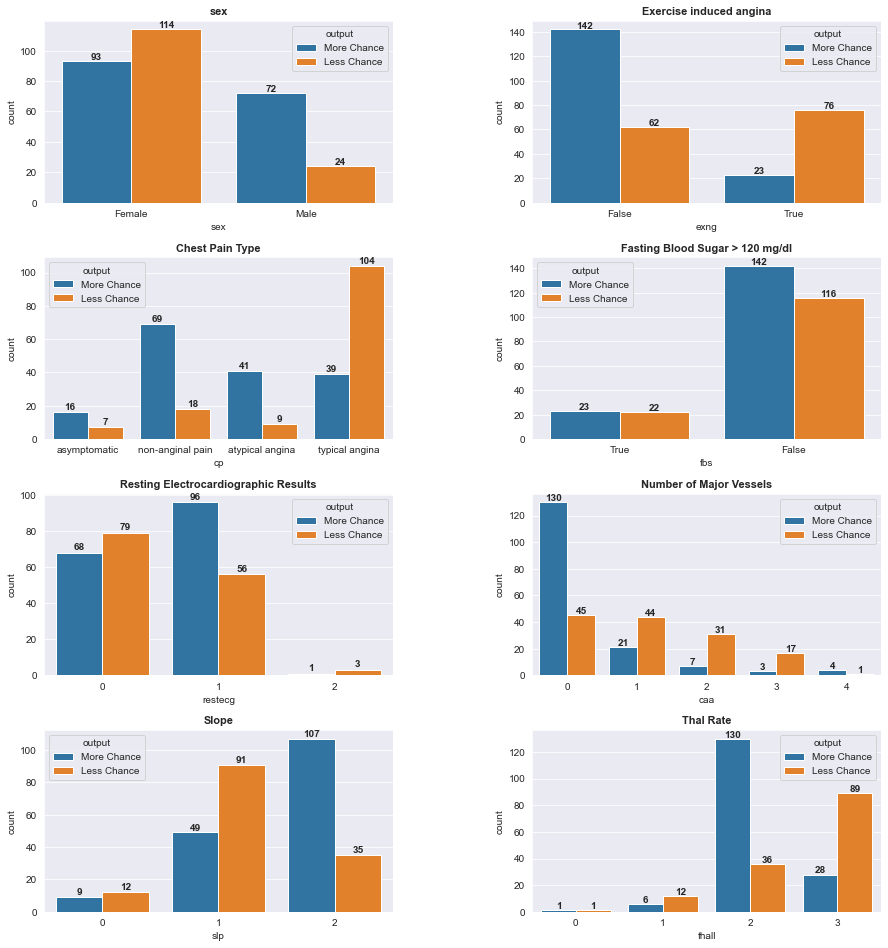

In [11]:
def graph(name, u, title):
    sns.countplot(x=c_data[name], hue=c_data['output'], ax=u)
    
    plt.setp(u.get_xticklabels(), rotation=0)
    u.set_title(title, fontsize=11, fontdict={"fontweight": "bold"})
    
    for p in u.patches:
        text = str(int(p.get_height()))
        u.annotate(text, (p.get_x()+p.get_width()/2, p.get_height()+3),
                   ha="center", va='center', fontsize=10, fontweight="bold")

fig2, ax2 = plt.subplots(4,2, figsize=(15, 15), gridspec_kw={"wspace" : 0.4, "hspace" : 0.3, "top": 0.95})

colors=["#ff0000","#ff8000","#ffff00","#80ff00","#00ff00", "#00ff80", "#00ffff", "#0080ff", "#0000ff", "#8000ff", "#ff00ff", "#ff0080"]

graph("sex", ax2[0,0], 'sex')
graph("exng", ax2[0,1], 'Exercise induced angina')
graph("cp", ax2[1,0], 'Chest Pain Type')
graph("fbs", ax2[1,1], 'Fasting Blood Sugar > 120 mg/dl')
graph('restecg', ax2[2,0], 'Resting Electrocardiographic Results')
graph('caa', ax2[2,1], 'Number of Major Vessels')
graph('slp', ax2[3,0], 'Slope')
graph('thall', ax2[3,1], 'Thal Rate')

plt.rcParams['axes.axisbelow'] = True

plt.savefig("Categorical Features.jpg")

## Gender Percentage

In [12]:
display(c_data.groupby(['sex','output']).agg(['count'])['age'])
female_rate = round(93/207*100,2)
male_rate = round(72/96*100,2)
print(f'\n\nFemale Heart Attack Rate: {female_rate}%')
print(f'Male Heart Attack Rate: {male_rate}%')

count
sex    output            
Female Less Chance    114
       More Chance     93
Male   Less Chance     24
       More Chance     72



Female Heart Attack Rate: 44.93%
Male Heart Attack Rate: 75.0%


## Age Visualization

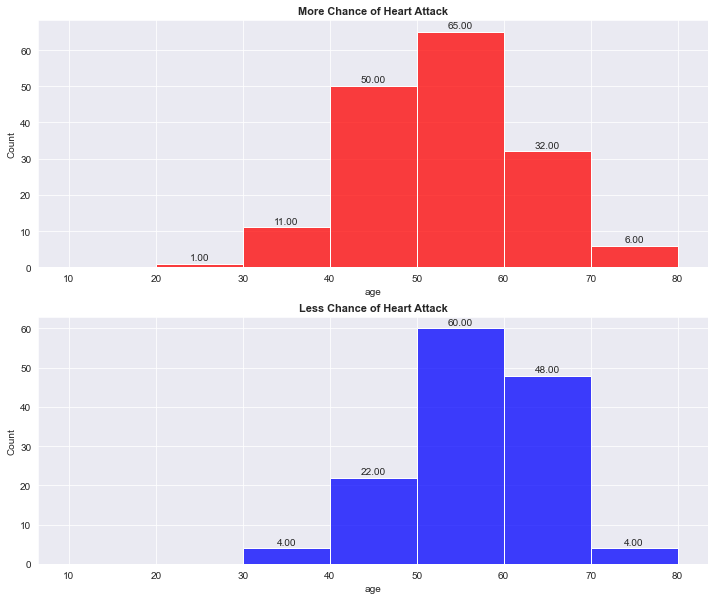

In [13]:
fig, ax = plt.subplots(2, 1,figsize=(12,10))
a = sns.histplot(c_data['age'].loc[c_data['output']=='More Chance'], bins=10, binwidth=10, binrange=(10,80), color='red', ax=ax[0])
for p in a.patches:
    a.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()-1), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
ax[0].set_title('More Chance of Heart Attack', fontsize=11, fontdict={"fontweight": "bold"})

b = sns.histplot(c_data['age'].loc[c_data['output']=='Less Chance'], bins=10, binwidth=10, binrange=(10,80), color='blue', ax=ax[1])
for p in b.patches:
    b.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()-1), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
ax[1].set_title('Less Chance of Heart Attack', fontsize=11, fontdict={"fontweight": "bold"})

plt.rcParams['axes.axisbelow'] = True

plt.savefig("Age Visualization")

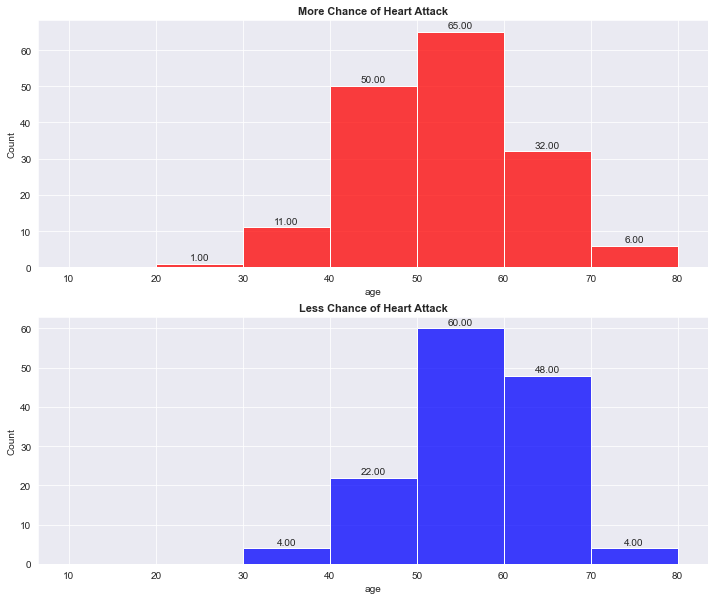

In [14]:
fig, ax = plt.subplots(2, 1,figsize=(12,10))
a = sns.histplot(c_data['age'].loc[c_data['output']=='More Chance'], bins=10, binwidth=10, binrange=(10,80), color='red', ax=ax[0])
for p in a.patches:
    a.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()-1), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
ax[0].set_title('More Chance of Heart Attack', fontsize=11, fontdict={"fontweight": "bold"})

b = sns.histplot(c_data['age'].loc[c_data['output']=='Less Chance'], bins=10, binwidth=10, binrange=(10,80), color='blue', ax=ax[1])
for p in b.patches:
    b.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()-1), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
ax[1].set_title('Less Chance of Heart Attack', fontsize=11, fontdict={"fontweight": "bold"})

plt.rcParams['axes.axisbelow'] = True

In [15]:
age_data = c_data.copy()
index = 0

for x in age_data['age']:
    if x>=20 and x<30:
        age_data['age'][index] = '20s'
    elif x>=30 and x<40:
        age_data['age'][index] = '30s'
    elif x>=40 and x<50:
        age_data['age'][index] = '40s'
    elif x>=50 and x<60:
        age_data['age'][index] = '50s'
    elif x>=60 and x<70:
        age_data['age'][index] = '60s'
    elif x>=70 and x<80:
        age_data['age'][index] = '70s'
    index+=1
    
age = pd.DataFrame(age_data.groupby(['age','output'])['sex'].count())
display(age)

thirties = round(11/15*100, 2)
fourties = round(50/72*100, 2)
fifties = round(65/125*100, 2)
sixties = round(32/80*100, 2)
seventies = round(6/10*100, 2)

print('More Chance of Heart Attack Percentages... \n\n')
print(f'Thirties: {thirties}%\n')
print(f'Fourties: {fourties}%\n')
print(f'Fifties: {fifties}%\n')
print(f'Sixties: {sixties}%\n')
print(f'Seventies: {seventies}%\n')

sex
age output          
20s More Chance    1
30s Less Chance    4
    More Chance   11
40s Less Chance   22
    More Chance   50
50s Less Chance   60
    More Chance   65
60s Less Chance   48
    More Chance   32
70s Less Chance    4
    More Chance    6

More Chance of Heart Attack Percentages... 


Thirties: 73.33%

Fourties: 69.44%

Fifties: 52.0%

Sixties: 40.0%

Seventies: 60.0%



## Visualization of the Continuous Features

In [16]:
con_data = data[['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']]

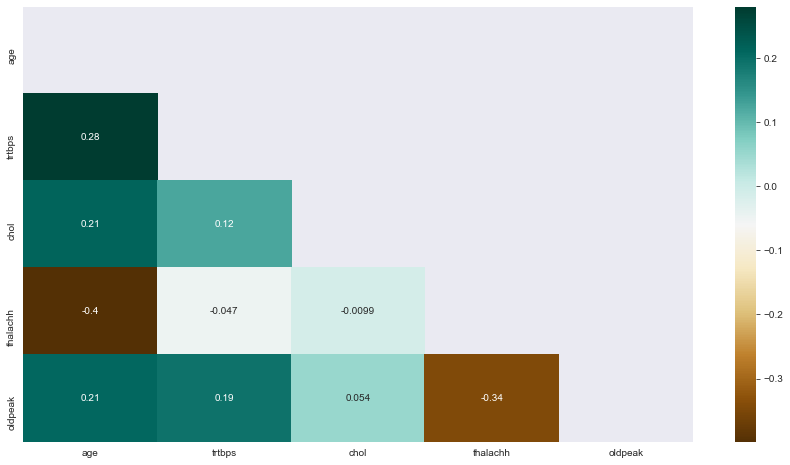

In [17]:
plt.figure(figsize=(15,8))
mask = np.triu(np.ones_like(con_data.corr(), dtype=np.bool))
sns.heatmap(data=con_data.corr(),annot=True,cmap='BrBG',mask=mask)

plt.savefig("Continuous Features Heatmap")

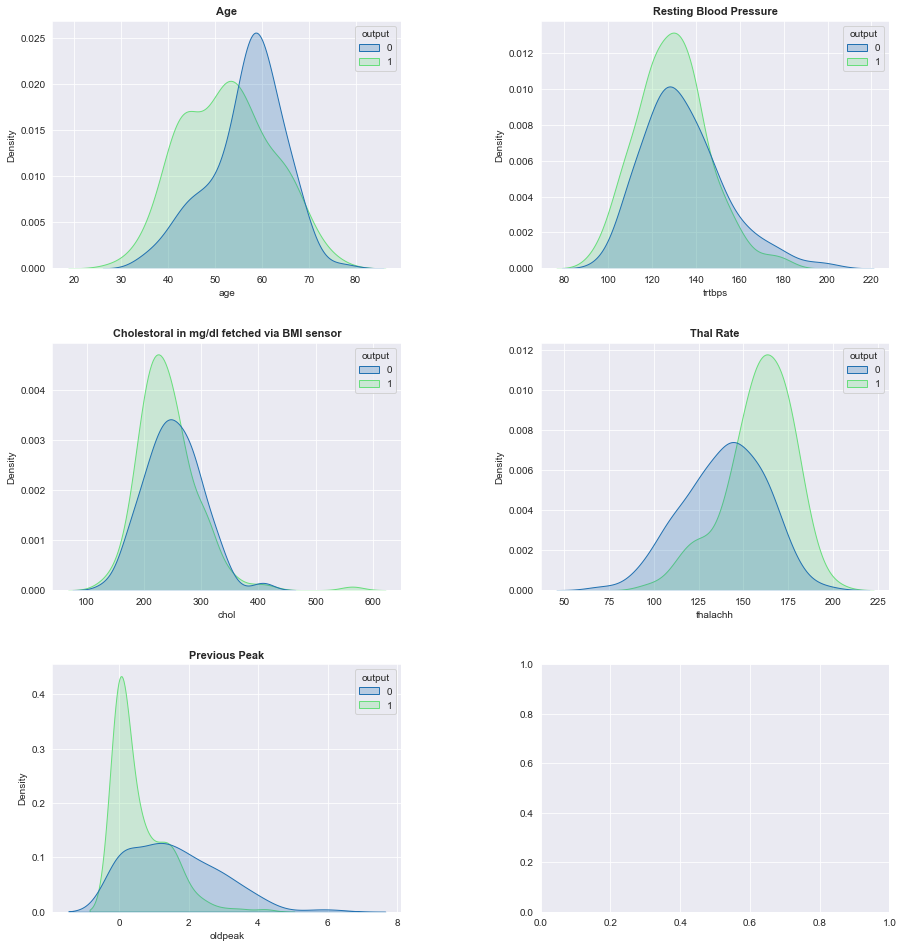

In [18]:
def graph1(name, u, title):
    sns.kdeplot(x=con_data[name],hue=data['output'], ax=u, shade=True, palette=['#2271b1','#68de7c'])
    u.set_title(title, fontsize=11, fontdict={"fontweight": "bold"})
    

fig2, ax2 = plt.subplots(3,2, figsize=(15, 15), gridspec_kw={"wspace" : 0.4, "hspace" : 0.3, "top": 0.95})

colors=["#ff0000","#ff8000","#ffff00","#80ff00","#00ff00", "#00ff80", "#00ffff", "#0080ff", "#0000ff", "#8000ff", "#ff00ff", "#ff0080"]

graph1("age", ax2[0,0], 'Age')
graph1("trtbps", ax2[0,1], 'Resting Blood Pressure')
graph1("chol", ax2[1,0], 'Cholestoral in mg/dl fetched via BMI sensor')
graph1("thalachh", ax2[1,1], 'Thal Rate')
graph1('oldpeak', ax2[2,0], 'Previous Peak')


plt.rcParams['axes.axisbelow'] = True

plt.savefig("Continuous Features KDE Plots.jpg")

# Data Preprocessing

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [20]:
X = data.drop('output', axis=1)
y = data['output']

sc = StandardScaler()
scaled_X = sc.fit_transform(X)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.2, random_state=42)

In [22]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

# Machine Learning

In [23]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score
from sklearn import metrics

### Logistic Regression

In [24]:
model1 = LogisticRegression(max_iter=1000)
model1.fit(X_train, y_train)
pred1 = model1.predict(X_test)
acc1 = accuracy_score(pred1, y_test)
print(classification_report(pred1, y_test))
print(acc1)

              precision    recall  f1-score   support

           0       0.86      0.83      0.85        30
           1       0.84      0.87      0.86        31

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

0.8524590163934426


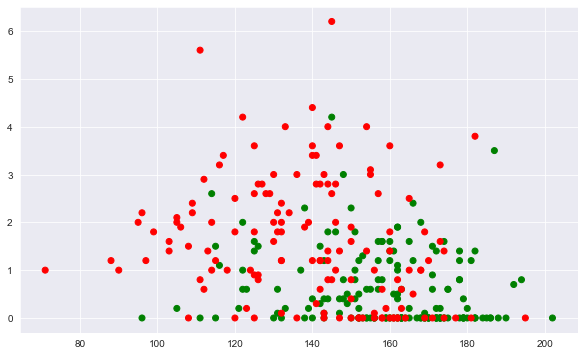

In [39]:
plt.figure(figsize = (10, 6))
colors={0:'red', 1:'green'}
plt.scatter(data['thalachh'], data['oldpeak'], c=data['output'].map(colors))
plt.savefig("Scatter plot of two important features.jpg")
plt.show()



### Naive Bayes - Gaussian NB

In [26]:
model2 = GaussianNB()
model2.fit(X_train, y_train)
pred2 = model2.predict(X_test)
acc2 = accuracy_score(pred2, y_test)
print(classification_report(pred2, y_test))
print(acc2)

              precision    recall  f1-score   support

           0       0.90      0.84      0.87        31
           1       0.84      0.90      0.87        30

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

0.8688524590163934


In [27]:
from scipy.stats import shapiro
con_features = ['oldpeak','thalachh', 'chol', 'age', 'trtbps']
for i in data[con_features].columns:
    print(f'{i} {"Not Gaussian" if shapiro(data[i])[1]<0.05 else "Gaussian"}  {shapiro(data[i])}')

oldpeak Not Gaussian  ShapiroResult(statistic=0.8441833853721619, pvalue=8.18340235561653e-17)
thalachh Not Gaussian  ShapiroResult(statistic=0.9763151407241821, pvalue=6.620329077122733e-05)
chol Not Gaussian  ShapiroResult(statistic=0.9468814134597778, pvalue=5.364669153351542e-09)
age Not Gaussian  ShapiroResult(statistic=0.9863715767860413, pvalue=0.005801409482955933)
trtbps Not Gaussian  ShapiroResult(statistic=0.965917706489563, pvalue=1.4580031120203785e-06)


### KNN

In [28]:
model3 = KNeighborsClassifier(n_neighbors=6)
model3.fit(X_train, y_train)
pred3 = model3.predict(X_test)
acc3 = accuracy_score(pred3, y_test)
print(classification_report(pred3, y_test))
print(acc3)

              precision    recall  f1-score   support

           0       0.97      0.90      0.93        31
           1       0.91      0.97      0.94        30

    accuracy                           0.93        61
   macro avg       0.94      0.93      0.93        61
weighted avg       0.94      0.93      0.93        61

0.9344262295081968


### Decision Tree

In [29]:
model4= DecisionTreeClassifier(max_depth=10, min_samples_leaf=15)
model4.fit(X_train, y_train)
pred4 = model4.predict(X_test)
acc4 = accuracy_score(pred4, y_test)
print(classification_report(pred4, y_test))
print(acc4)

              precision    recall  f1-score   support

           0       0.83      0.80      0.81        30
           1       0.81      0.84      0.83        31

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61

0.819672131147541


### Random Forest

In [30]:
model5 = RandomForestClassifier()
model5.fit(X_train, y_train)
pred5 = model5.predict(X_test)
acc5 = accuracy_score(pred5, y_test)
print(classification_report(pred5, y_test))
print(acc5)

              precision    recall  f1-score   support

           0       0.86      0.83      0.85        30
           1       0.84      0.87      0.86        31

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

0.8524590163934426


### SVC

In [31]:
model6 = SVC()
model6.fit(X_train, y_train)
pred6 = model6.predict(X_test)
acc6 = accuracy_score(pred6, y_test)
print(classification_report(pred6, y_test))
print(acc6)

              precision    recall  f1-score   support

           0       0.90      0.84      0.87        31
           1       0.84      0.90      0.87        30

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

0.8688524590163934


### XGBoost Classifier

In [45]:
model7 = XGBClassifier()
eval_set = [(X_train, y_train),(X_test, y_test)]
model7.fit(X_train, y_train, eval_metric=['error','logloss'], eval_set = eval_set)
pred7 = model7.predict(X_test)
acc7 = accuracy_score(pred7, y_test)
print(classification_report(pred7, y_test))
print(acc7)

[0]	validation_0-error:0.10744	validation_0-logloss:0.53560	validation_1-error:0.22951	validation_1-logloss:0.56939
[1]	validation_0-error:0.06198	validation_0-logloss:0.43165	validation_1-error:0.18033	validation_1-logloss:0.49563
[2]	validation_0-error:0.04959	validation_0-logloss:0.36164	validation_1-error:0.16393	validation_1-logloss:0.44202
[3]	validation_0-error:0.04132	validation_0-logloss:0.31516	validation_1-error:0.16393	validation_1-logloss:0.41896
[4]	validation_0-error:0.03719	validation_0-logloss:0.26970	validation_1-error:0.18033	validation_1-logloss:0.39616
[5]	validation_0-error:0.03719	validation_0-logloss:0.23844	validation_1-error:0.14754	validation_1-logloss:0.38414
[6]	validation_0-error:0.02066	validation_0-logloss:0.21594	validation_1-error:0.14754	validation_1-logloss:0.37721
[7]	validation_0-error:0.01653	validation_0-logloss:0.19676	validation_1-error:0.13115	validation_1-logloss:0.37313
[8]	validation_0-error:0.01653	validation_0-logloss:0.17780	validation_1

### XGBoost Evaluation

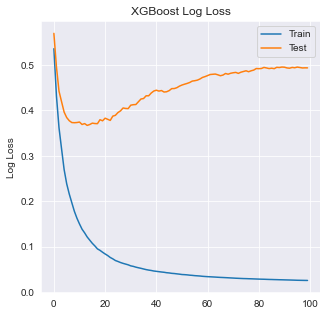

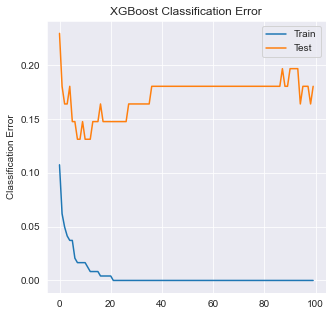

In [47]:
results = model7.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0,epochs)

fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()
# plot classification error
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
plt.ylabel('Classification Error')
plt.title('XGBoost Classification Error')
plt.savefig("XGBoost Evaluation.jpg")
plt.show()



In [34]:
model7 = XGBClassifier()
eval_set = [(X_test, y_test)]
model7.fit(X_train, y_train, early_stopping_rounds = 5, eval_metric='logloss', eval_set = eval_set)
pred7 = model7.predict(X_test)
acc7 = accuracy_score(pred7, y_test)
print(classification_report(pred7, y_test))
print(acc7)

[0]	validation_0-logloss:0.56939
[1]	validation_0-logloss:0.49563
[2]	validation_0-logloss:0.44202
[3]	validation_0-logloss:0.41896
[4]	validation_0-logloss:0.39616
[5]	validation_0-logloss:0.38414
[6]	validation_0-logloss:0.37721
[7]	validation_0-logloss:0.37313
[8]	validation_0-logloss:0.37277
[9]	validation_0-logloss:0.37320
[10]	validation_0-logloss:0.37424
[11]	validation_0-logloss:0.36889
[12]	validation_0-logloss:0.37087
[13]	validation_0-logloss:0.36685
[14]	validation_0-logloss:0.36883
[15]	validation_0-logloss:0.37182
[16]	validation_0-logloss:0.37097
[17]	validation_0-logloss:0.37065
              precision    recall  f1-score   support

           0       0.86      0.83      0.85        30
           1       0.84      0.87      0.86        31

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

0.8524590163934426


# Model Comparison Table

In [35]:
acc_table = pd.DataFrame({'Model': ['Logistic Regression',
                                   'Naive Bayes',
                                   'KNN',
                                   'Decision Tree',
                                   'Random Forest Tree',
                                   'SVC',
                                   'XGB'],
                         'Accuracy Score': [acc1,
                                           acc2,
                                           acc3,
                                           acc4,
                                           acc5,
                                           acc6,
                                           acc7]})
acc_table = acc_table.sort_values(by='Accuracy Score', ascending=False)
acc_table.style.background_gradient(cmap='Reds')



,Model,Accuracy Score
2,KNN,0.934426
1,Naive Bayes,0.868852
5,SVC,0.868852
0,Logistic Regression,0.852459
4,Random Forest Tree,0.852459
6,XGB,0.852459
3,Decision Tree,0.819672


# ROC Curve of KNN Model

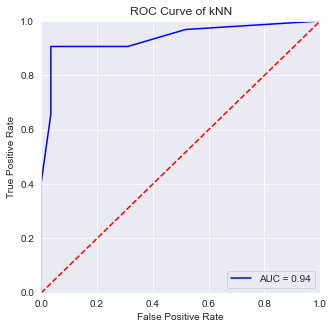

In [41]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

y_scores = model3.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.savefig("ROC Curve of KNN model.jpg")
plt.show()



# KNN Visualization

<AxesSubplot:>

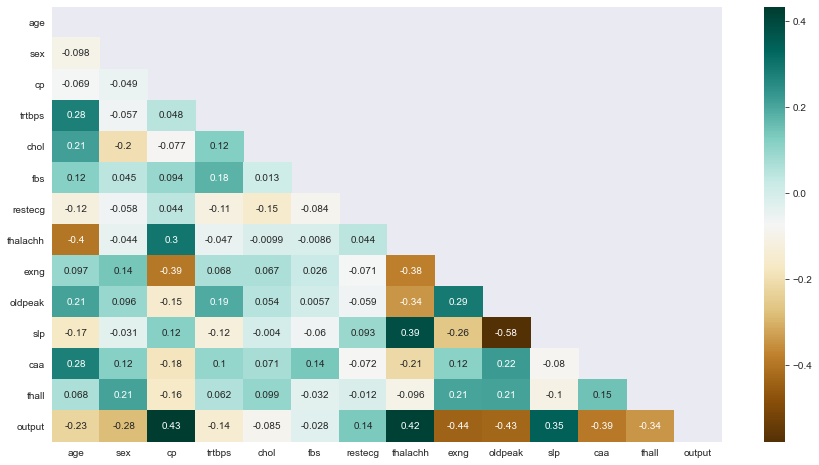

In [37]:
plt.figure(figsize=(15,8))
mask = np.triu(np.ones_like(data.corr(), dtype=np.bool))
sns.heatmap(data=data.corr(),annot=True,cmap='BrBG',mask=mask)

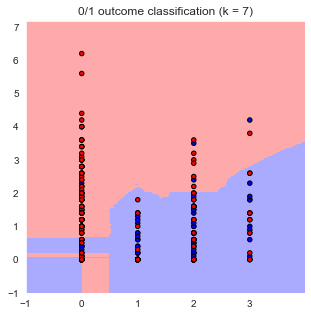

----------------------------------------------------------------------
Classification report
----------------------------------------------------------------------

               precision    recall  f1-score   support

           0       0.87      0.69      0.77        29
           1       0.76      0.91      0.83        32

    accuracy                           0.80        61
   macro avg       0.82      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61

----------------------------------------------------------------------
Accuracy = 0.803
----------------------------------------------------------------------


In [48]:
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score, classification_report
# filter warnings
warnings.filterwarnings("ignore")

def accuracy(k, X_train, y_train, X_test, y_test):
    # instantiate learning model and fit data
    knn = KNeighborsClassifier(n_neighbors=k)    
    knn.fit(X_train, y_train)

    # predict the response
    pred = knn.predict(X_test)

    # evaluate and return  accuracy
    return accuracy_score(y_test, pred)

def classify_and_plot(X, y):
    ''' 
    split data, fit, classify, plot and evaluate results 
    '''
    # split data into training and testing set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

    # init vars
    n_neighbors = 7
    h           = .02  # step size in the mesh

    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_bold  = ListedColormap(['#FF0000', '#0000FF'])

    rcParams['figure.figsize'] = 5, 5
        
    clf = KNeighborsClassifier(n_neighbors)
    clf.fit(X_train, y_train)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

        # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    fig = plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

        # Plot also the training points, x-axis = 'Glucose', y-axis = "BMI"
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)   
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("0/1 outcome classification (k = %i)" % (n_neighbors))
    plt.savefig("KNN Visualization.jpg")
    plt.show()

        # evaluate
    y_expected  = y_test
    y_predicted = clf.predict(X_test)

        # print results
    print('----------------------------------------------------------------------')
    print('Classification report')
    print('----------------------------------------------------------------------')
    print('\n', classification_report(y_expected, y_predicted))
    print('----------------------------------------------------------------------')
    print('Accuracy = %5s' % round(accuracy(n_neighbors, X_train, y_train, X_test, y_test), 3))
    print('----------------------------------------------------------------------')

# we only take the best two features and prepare them for the KNN classifier
rows_nbr = 303 # data.shape[0]
X_prime  = np.array(data.iloc[:rows_nbr, [2,9]])
X        = X_prime # preprocessing.scale(X_prime)
y        = np.array(data.iloc[:rows_nbr, 13])

# classify, evaluate and plot results
classify_and_plot(X, y)

